# Training Models

In [21]:
import pandas as pd
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
import os
%matplotlib inline


ROOT_DIR = os.path.join('C:\\', 'Users', 'sebas', 'OneDrive', 'Python', 'machine_learning', 'ml_learning')
FUNCTIONS_PATH = os.path.join(ROOT_DIR, 'functions')
sys.path.append(FUNCTIONS_PATH) #extend search path to load functions later on

## Linear Regression

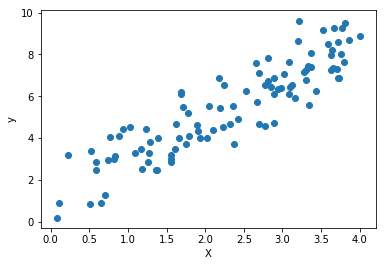

In [2]:
#generate random linear datapoints
X = 4*np.random.rand(100, 1)
y = 4/3 + 7/4 *X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Now, lets compute the value of $\theta$ using the normal equation
remember, the normal equation is 

$$\theta=(X^{T}X)^{-1} X^{T}y$$

In [3]:
X_b = np.c_[np.ones((100,1)), X] #add X0 = 1 to each instance

#now calculate the dot product, using normal equation
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

### Normal Equation
lets break down the above equation one part at a time:

```python 
np.linalg.inv(X_b.T.dot(X_b))
```
is the same as $$\theta=(X^{T}X)^{-1}$$

```np.linalg.inv``` takes care of the inverse, then everything inside is the dot product of X_b transpose (T) and X_b, hence
the X_b.T.dot(X_b)

next, we take that resulting matrix and get the dot product of X_b.dot(y), which is the $$X^{T}y$$

to simplify:

`np.linalg.inv(X_b.T.dot(X_b))` = $$\theta=(X^{T}X)^{-1}$$
`...dot(X_b.T).dot(y)` = $$X^{T}y$$

In [4]:
best_theta

array([[1.22764358],
       [1.8307767 ]])

In [5]:
#now lets make some predictions using best_theta
X_new = np.array([[0], [4]]) #here we create 2 instances at 0 and 2
X_new_b = np.c_[np.ones((2,1)), X_new]#here we add 1s to the first column (X0)
y_predict = X_new_b.dot(best_theta)
y_predict

array([[1.22764358],
       [8.55075038]])

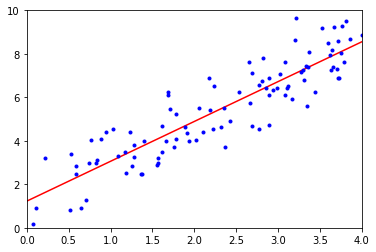

In [6]:
#lets plot the line of best fit
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,4,0,10])
plt.show()

In [7]:
# now lets see what we get when we fit linear regression to our data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.22764358]), array([[1.8307767]]))

In [8]:
lin_reg.predict(X_new)

array([[1.22764358],
       [8.55075038]])

### Gradient Descent

The equation for gradient descent, in vectorized form is the following: 
$$ \nabla_{\theta} MSE(\theta) = \frac{2}{m}X^{T}(X\theta - y)$$

the following equation is for a single step of gradient descent:
$$ \theta^{next step} = \theta - n \nabla_{\theta}MSE(\theta)$$

In [9]:
#now lets implemennt this in python
eta = 0.1 # set the learning rate (n)
n_iterations = 1000
m = 100 #number of samples or instances

theta = np.random.randn(2,1) #random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #this is the first equation above
    theta = theta - eta * gradients #this is the second equation above


notice that we set the variable "gradients" to equal the MSE calculation, then we used that gradient in the second equation for the next step.

In [10]:
theta

array([[1.22764358],
       [1.8307767 ]])

### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is that it uses the entire training set so it can take a long time to compute if you have a large amount of data.
Stochastic Gradient Descent however, uses random instances to compute gradient descent, instead of the entire training set, making it much quicker, however 
this makes the computation much more sporadic because of its random nature. Once it reaches the minimum, it will still be sort of bouncing around, so while the 
results are good, they may not necessarily be optimal.
- one solution to this issue is to gradually reduce the learning rate, so that by the time it gets to the minimum, the learning rate is so small that it ends up setteling instead of continuing to bounce around.

lets implement SGD in code:

In [11]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range (m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch *m + 1)
        theta = theta - eta * gradients

In [12]:
theta

array([[1.28447113],
       [1.80335292]])

In [13]:
# you can also use the SGD class provided by scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([1.1686949]), array([1.74038936]))

### Mini-batch Gradient Descent
This is similar to the previous except  a few differences:
- At each step, instead of using the whole training set (like Batch GD) or random instances (like SGD), it uses small random sets of instances (called *mini-batches*)
    - main advantage over SGD:
        - you get a performance boost

## Polynomial Regression

Most of the time the data will be much more complex than a straight line.
In these cases, we can fit a linear model to nonlinear data, by adding powers of each feature as new features.

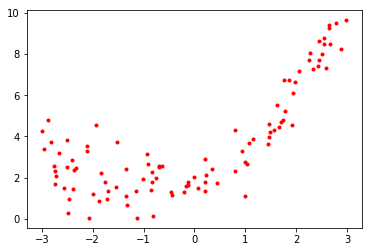

In [35]:
# Create non-linear data to play with
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'r.')
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('X: ', X[0])
print('X_poly: ', X_poly[0])

X:  [2.69828879]
X_poly:  [2.69828879 7.2807624 ]


*Notice how X_poly now includes the original feature, as well as the square of that feature*
Now lets fit linear regression to this new, extended dataset

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.40909256]), array([[0.94566404, 0.39327194]]))

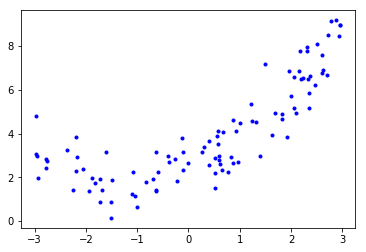

In [17]:
plt.plot(X, y, 'b.')
plt.plot(X[0], X[3], 'r-')
plt.show()

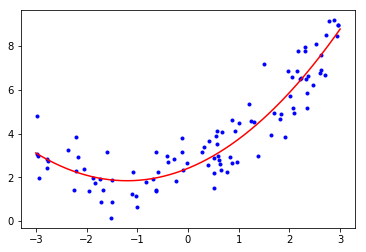

In [18]:
X_new = np.linspace(-3, 3,200).reshape(200,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-')

In [22]:
from ml_functions import plot_learning_curves as plc

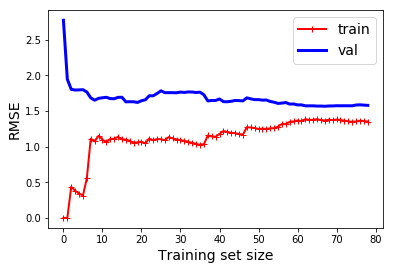

In [23]:
plc(lin_reg, X, y)

Notice a few things about the graph above:
- when the training size is small, there is small errors on the training set
- at this same time, the the errors are large on validation set because of such few training examples.

When more and more training examples are introduced:
- the model has a hard time fitting all the points (linear model fitting polynomial data) and so the errors rise and then plateau
- at the same time, on the validation set, the errors decrease until again it hits a plateau

This is an example of a model that is underfitting:
- Both curves have plateaued, and are close and fairly high in errors

Lets look at a curve of a 2nd-degree polynomial, to get a view at what *overfitting* looks like

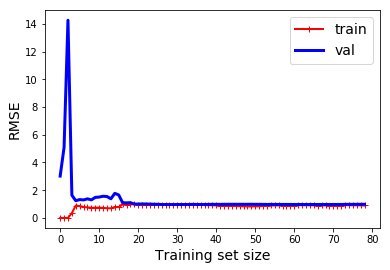

In [38]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plc(polynomial_regression, X, y)

Notice here 2 things:
- the errors on the training data are quite low (at around 1) compared with the linear regression from before
- there is a gap between the curves, meaning that the model performs much better on the training set than the data set.
    - this means that this model is overfitting, as it is not generalizing very well. 
        - one way to improve this is by adding more training data until the validation error reaches the training error

## Regularized Linear Models ##
A good way to reduce overfitting is by simplifying the data. This can be done by regularizing the model (i.e constraining it).
One way to regularize a polynomial model is by reducing the number of polynomial degrees.

For linear models, regularization is done by constraining the weights of the model. To understand this, we will now look 3 different ways to achieve this:
- Ridge Regression
- Lasso Regression
- Elastic Net

### Ridge Regression###